<center><h1> Capstone Project

<center><h2> The Battle of the Neighborhoods

![Image of Central Park](https://s3.amazonaws.com/assets.centralparknyc.org/images/about/history/history-1.jpg)

<h2><center> -- Introduction --

In New York City, accessibility and proximity to public services are highly valued. A local park can be a very attractive addition to a densely populated neighborhood. Similarly, a nearby subway station can significantly shorten one's daily commute. These luxuries are often desired by renters; however, they come at a cost. Not all neighborhoods have beautiful parks or a subway station right around the corner.


When renters seek a residential rental property in the city, it's important that they understand how much an amenity or service like these can affect rents. Likewise, landlords should be concious of the value placed on amenities and services surrounding their property to ensure their asking price relfects the market value. 

In this capstone project, I aim to answer the question, how does proximity to subway stations and public parks affect the median rent (asking price) in New York City neighborhoods?

<h2><center> -- Data --

In order to conduct my analysis, I will need to source location data for New York City and separate it into geographical boundaries defined by the cities boroughs. Additionally, I will need information about the proximity of subway stations and public parks to residents in each neighborhood. Fortunately, much of this data is available from the NYU Furman Center which provides historical data on the city's neighborhood populations.

I will be using information from 2017 as it is the most recent year that has the most complete data within the database.

-The proximity to a subway station will be defined by the percentage of residential units that are within a half mile walk of a station entrance for the New York City Subway, Long Island Rail Road, PATH, Amtrak, Metro-North Railroad, or Staten Island Railway.

-The proximity to a public park will be defined by the percentage of residential units that are within a quarter mile of a park.

-Median rent will be defined as the median rent that landlords ask for housing units available for rent (in USD). 
   

<h2><center> -- Methodology --

<h3> Importing and Formatting Data

In [2]:
#Importing libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import types
from botocore.client import Config
import ibm_boto3
%matplotlib inline

<h3><center> Park Data

The percentage of residential units that are within a quarter mile of a park.

The following cell contains sensitive information 

In [3]:
#Import Park Data

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ed42ea0357ce4eb68d8c6921e375c3a8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rgcmLsf_PHcYTLDHym9gZX-yld2ABY9wq5G9I6t7Oz0g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed42ea0357ce4eb68d8c6921e375c3a8.get_object(Bucket='courseracapstonefinal-donotdelete-pr-gzmr4cupvznlu7',Key='Park_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Park_import = pd.read_csv(body)
df_Park_import.head()




,short_name,long_name,Community District,2017
0,prox_park_pct,Residential units within 1/4 mile of a park,MN 01 - Financial District,0.986067
1,prox_park_pct,Residential units within 1/4 mile of a park,MN 02 - Greenwich Village/Soho,0.995910
2,prox_park_pct,Residential units within 1/4 mile of a park,MN 03 - Lower East Side/Chinatown,0.997909
3,prox_park_pct,Residential units within 1/4 mile of a park,MN 04 - Clinton/Chelsea,0.789133
4,prox_park_pct,Residential units within 1/4 mile of a park,MN 05 - Midtown,0.635637


In [4]:
#Making new dataframe for park data
#Keeping only relevant columns

df_park= df_Park_import[['Community District','2017']]
df_park = df_park.rename(columns={'2017': '% Nearby Park'})
df_park.head()



,Community District,% Nearby Park
0,MN 01 - Financial District,0.986067
1,MN 02 - Greenwich Village/Soho,0.995910
2,MN 03 - Lower East Side/Chinatown,0.997909
3,MN 04 - Clinton/Chelsea,0.789133
4,MN 05 - Midtown,0.635637


<h3><center> Subway Data

The percentage of residential units that are within a half mile walk of a station entrance for the New York City Subway, Long Island Rail Road, PATH, Amtrak, Metro-North Railroad, or Staten Island Railway.

In [5]:
#Importing Subway Data

body = client_ed42ea0357ce4eb68d8c6921e375c3a8.get_object(Bucket='courseracapstonefinal-donotdelete-pr-gzmr4cupvznlu7',Key='Subway_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Subway_import = pd.read_csv(body)
df_Subway_import.head()


,short_name,long_name,Community District,2017
0,prox_subway_pct,Residential units within 1/2 mile of a subway ...,MN 01 - Financial District,1.000000
1,prox_subway_pct,Residential units within 1/2 mile of a subway ...,MN 02 - Greenwich Village/Soho,1.000000
2,prox_subway_pct,Residential units within 1/2 mile of a subway ...,MN 03 - Lower East Side/Chinatown,0.855089
3,prox_subway_pct,Residential units within 1/2 mile of a subway ...,MN 04 - Clinton/Chelsea,0.943890
4,prox_subway_pct,Residential units within 1/2 mile of a subway ...,MN 05 - Midtown,1.000000


In [6]:
#Making new dataframe for subway data
#Keeping only relevant columns

df_subway= df_Subway_import[['Community District', '2017']]
df_subway = df_subway.rename(columns={'2017': '% Nearby Subway'})
df_subway.head()

,Community District,% Nearby Subway
0,MN 01 - Financial District,1.000000
1,MN 02 - Greenwich Village/Soho,1.000000
2,MN 03 - Lower East Side/Chinatown,0.855089
3,MN 04 - Clinton/Chelsea,0.943890
4,MN 05 - Midtown,1.000000


<h3><center> Median Rent Data

The median rent that landlords ask for housing units available for rent. 

In [7]:
#Importing Rent Data

body = client_ed42ea0357ce4eb68d8c6921e375c3a8.get_object(Bucket='courseracapstonefinal-donotdelete-pr-gzmr4cupvznlu7',Key='Rent_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_rent_import = pd.read_csv(body)
df_rent_import.head()


,short_name,long_name,Community District,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,rent_asking_med,"Median rent, asking",MN 01 - Financial District,3495.0,3650.0,3895.0,3750.0,3875.0,3947.0,3950.0,3950,3995
1,rent_asking_med,"Median rent, asking",MN 02 - Greenwich Village/Soho,3200.0,3300.0,3495.0,3400.0,3500.0,3600.0,3700.0,3595,3662
2,rent_asking_med,"Median rent, asking",MN 03 - Lower East Side/Chinatown,2495.0,2600.0,2850.0,3000.0,3000.0,3000.0,3150.0,3000,3150
3,rent_asking_med,"Median rent, asking",MN 04 - Clinton/Chelsea,2900.0,3050.0,3235.0,3468.0,3490.0,3795.0,3750.0,3400,3467
4,rent_asking_med,"Median rent, asking",MN 05 - Midtown,3495.0,3595.0,3712.5,3655.0,3750.0,3800.0,3830.0,4000,4000


In [8]:
#Making new dataframe for rent data
#Keeping only relevant columns

df_rent= df_rent_import[['Community District', '2017']]
df_rent = df_rent.rename(columns={'2017': 'Median Rent'})
df_rent.head()

,Community District,Median Rent
0,MN 01 - Financial District,3950
1,MN 02 - Greenwich Village/Soho,3595
2,MN 03 - Lower East Side/Chinatown,3000
3,MN 04 - Clinton/Chelsea,3400
4,MN 05 - Midtown,4000


<h3><center> Combining into a single dataframe

In [25]:
#Combining Park and Subway dataframes
df_park.insert(2, "% Nearby Subway", df_subway['% Nearby Subway'], True)
df_park.head()

,Community District,% Nearby Park,% Nearby Subway
0,MN 01 - Financial District,0.986067,1.000000
1,MN 02 - Greenwich Village/Soho,0.995910,1.000000
2,MN 03 - Lower East Side/Chinatown,0.997909,0.855089
3,MN 04 - Clinton/Chelsea,0.789133,0.943890
4,MN 05 - Midtown,0.635637,1.000000


In [26]:
#Adding Median Rent data to existing dataframe
df_park.insert(3, "Median Rent", df_rent['Median Rent'], True)

In [27]:
df_park.head()

,Community District,% Nearby Park,% Nearby Subway,Median Rent
0,MN 01 - Financial District,0.986067,1.000000,3950
1,MN 02 - Greenwich Village/Soho,0.995910,1.000000,3595
2,MN 03 - Lower East Side/Chinatown,0.997909,0.855089,3000
3,MN 04 - Clinton/Chelsea,0.789133,0.943890,3400
4,MN 05 - Midtown,0.635637,1.000000,4000


In [28]:
#New dataframe containing all columns
df_combined=df_park
df_combined.head()


,Community District,% Nearby Park,% Nearby Subway,Median Rent
0,MN 01 - Financial District,0.986067,1.000000,3950
1,MN 02 - Greenwich Village/Soho,0.995910,1.000000,3595
2,MN 03 - Lower East Side/Chinatown,0.997909,0.855089,3000
3,MN 04 - Clinton/Chelsea,0.789133,0.943890,3400
4,MN 05 - Midtown,0.635637,1.000000,4000


<h3><center>Plotting Data

Initial observations

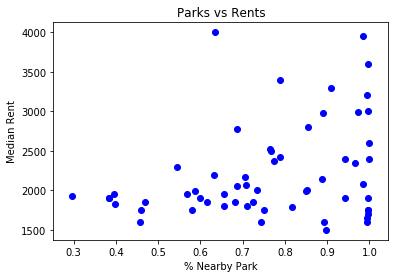

In [31]:
#% Nearby Park vs Median Rent

plt.scatter(df_combined[['% Nearby Park']], df_combined[['Median Rent']],  color='blue')
plt.title("Parks vs Rents")
plt.xlabel("% Nearby Park")
plt.ylabel("Median Rent")

plt.show()

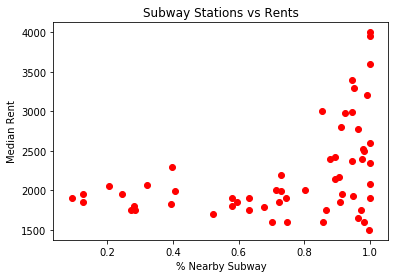

In [32]:
#% Nearby Subway vs Median Rent

plt.scatter(df_combined[['% Nearby Subway']], df_combined[['Median Rent']], color='red')
plt.title("Subway Stations vs Rents")
plt.xlabel("% Nearby Subway")
plt.ylabel("Median Rent")
plt.show()

Train & Test Dataset

In [312]:
#Setting a flag to split data into training and testing sets
#80 percent trains

msk = np.random.rand(len(df_combined)) < 0.80
train = df_combined[msk]
test = df_combined[~msk]

Multiple Linear Regression

Using multiple x variables to make a predicition for y (median rent)

In [313]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['% Nearby Subway','% Nearby Park']])
y = np.asanyarray(train[['Median Rent']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[843.80387046 363.09000384]]


In [314]:
y_hat= regr.predict(test[['% Nearby Subway','% Nearby Park']])
x = np.asanyarray(test[['% Nearby Subway','% Nearby Park']])
y = np.asanyarray(test[['Median Rent']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 147758.20
Variance score: 0.23


In [33]:
#Yhat is the estimated output while y is the correct output
#Variance is the square of the standard deviation
#Best possible scores is 1. lower scores are worse



<h2><center> -- Results & Discussion --

In my analysis I aimed to understand correlations and impacts of nearby neighborhood services (subway stations and parks) on the median rents in New York City neighborhoods. After creating a multiple linear regression model based on two independent variables, I found that the model had a very low variance score; thus, my prediction was far from perfect. At a score of just 0.23 (1 being a perfect prediction), this is not a reliable way to make accurate predictions of the median rental prices. Additionally, using the ordinary least squares method, the model attempted to minimize the error between the actual output and the predicted output. However, the residual sum of squares remained very high (147,758.30). 

If I could improve the model I would start by choosing different variables that may have a more direct correlation or bigger impact on rental prices. Subway stations and public parks can only give so much insight and are likely not among the driving factors that can make accurate predicitions. Clearly, factors such as income would have a significant impact on the rental prices in a neighborhood. Although, in this captsone, I attempted to use uncommon variables to generate similar patterns and insights. 

<h2><center> -- Conclusion --

In conclusion, this project has made me better understand the importance of taking time to forumlate a clear goal and plan from the very beginning. Even though many of the machine learning methods taught in this course can be used to conduct very insightful analysis or create amazingly accurate models, I think one of the most important lessons I learned is that these tools are only useful when properly applied to answer the question at hand. 

In this project, I could have included additional independent variables to try and give the model more training. However, if I included more data that didn't correlate any better than my other variables, I would run the risk of overfitting my model and the additional data wouldn't be helpful. This is why I believe spending the time to understand exactly what data to use for a model and which methods will do the best at solving the specific question is so important. 